In [1]:
#Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68288b2ebd8c72ea66d86c6a003da45d


In [3]:
#Create a set of random latitude and logitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [4]:
#Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [6]:
cities

['butaritari',
 'mataura',
 'new norfolk',
 'avera',
 'hasaki',
 'louisbourg',
 'rikitea',
 'port elizabeth',
 'naze',
 'falealupo',
 'nizhneyansk',
 'the valley',
 'ossora',
 'keflavik',
 'san cristobal',
 'roald',
 'klaksvik',
 'yellowknife',
 'busselton',
 'aromashevo',
 'saint-philippe',
 'ambon',
 'taolanaro',
 'altamira',
 'remetea chioarului',
 'ushuaia',
 'buala',
 'akureyri',
 'nanchong',
 'gizo',
 'saldanha',
 'tuktoyaktuk',
 'hailar',
 'mys shmidta',
 'cibitoke',
 'atuona',
 'cairns',
 'illoqqortoormiut',
 'katsuura',
 'vaini',
 'cayenne',
 'governador valadares',
 'cabo san lucas',
 'iquique',
 'saint anthony',
 'georgetown',
 'mrirt',
 'iqaluit',
 'marcona',
 'manokwari',
 'hermanus',
 'zhezkazgan',
 'coihaique',
 'kruisfontein',
 'kieta',
 'asau',
 'port macquarie',
 'bandarbeyla',
 'hobart',
 'upernavik',
 'victoria',
 'bredasdorp',
 'shimoda',
 'grenaa',
 'ahuimanu',
 'qaanaaq',
 'samusu',
 'jamestown',
 'albany',
 'kolindros',
 'antipovka',
 'punta arenas',
 'boguchany

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | avera
Processing Record 5 of Set 1 | hasaki
Processing Record 6 of Set 1 | louisbourg
City not found. Skipping...
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | naze
Processing Record 10 of Set 1 | falealupo
City not found. Skipping...
Processing Record 11 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 12 of Set 1 | the valley
Processing Record 13 of Set 1 | ossora
Processing Record 14 of Set 1 | keflavik
Processing Record 15 of Set 1 | san cristobal
Processing Record 16 of Set 1 | roald
Processing Record 17 of Set 1 | klaksvik
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | aromashevo
Processing Record 21 of Set 1 |

Processing Record 38 of Set 4 | igarka
Processing Record 39 of Set 4 | biltine
Processing Record 40 of Set 4 | amderma
City not found. Skipping...
Processing Record 41 of Set 4 | mongar
Processing Record 42 of Set 4 | pochutla
Processing Record 43 of Set 4 | roebourne
Processing Record 44 of Set 4 | avarua
Processing Record 45 of Set 4 | yerbogachen
Processing Record 46 of Set 4 | juazeiro
Processing Record 47 of Set 4 | broken hill
Processing Record 48 of Set 4 | cherskiy
Processing Record 49 of Set 4 | mar del plata
Processing Record 50 of Set 4 | cidreira
Processing Record 1 of Set 5 | padang
Processing Record 2 of Set 5 | kununurra
Processing Record 3 of Set 5 | fairbanks
Processing Record 4 of Set 5 | faanui
Processing Record 5 of Set 5 | avila
Processing Record 6 of Set 5 | amga
Processing Record 7 of Set 5 | gannan
Processing Record 8 of Set 5 | kapaa
Processing Record 9 of Set 5 | saskylakh
Processing Record 10 of Set 5 | puerto ayora
Processing Record 11 of Set 5 | castro
Proc

Processing Record 31 of Set 8 | shumerlya
Processing Record 32 of Set 8 | adiake
Processing Record 33 of Set 8 | northam
Processing Record 34 of Set 8 | chimore
Processing Record 35 of Set 8 | elko
Processing Record 36 of Set 8 | mana
Processing Record 37 of Set 8 | el faiyum
City not found. Skipping...
Processing Record 38 of Set 8 | kiunga
Processing Record 39 of Set 8 | paracuru
Processing Record 40 of Set 8 | bilma
Processing Record 41 of Set 8 | tahoua
Processing Record 42 of Set 8 | sitka
Processing Record 43 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 44 of Set 8 | mandalgovi
Processing Record 45 of Set 8 | turukhansk
Processing Record 46 of Set 8 | belaya gora
Processing Record 47 of Set 8 | chokurdakh
Processing Record 48 of Set 8 | north bend
Processing Record 49 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 50 of Set 8 | longyearbyen
Processing Record 1 of Set 9 | merrill
Processing Record 2 of Set 9 | maceio
Processing Record 3 of 

Processing Record 18 of Set 12 | colorines
Processing Record 19 of Set 12 | palmer
Processing Record 20 of Set 12 | portland
Processing Record 21 of Set 12 | la orilla
Processing Record 22 of Set 12 | homer
Processing Record 23 of Set 12 | kingsport
Processing Record 24 of Set 12 | ruatoria
City not found. Skipping...
Processing Record 25 of Set 12 | tombouctou
Processing Record 26 of Set 12 | varna
Processing Record 27 of Set 12 | pitimbu
Processing Record 28 of Set 12 | storforshei
Processing Record 29 of Set 12 | dinsor
City not found. Skipping...
Processing Record 30 of Set 12 | wagar
Processing Record 31 of Set 12 | ambilobe
Processing Record 32 of Set 12 | papara
Processing Record 33 of Set 12 | alanya
Processing Record 34 of Set 12 | sayyan
Processing Record 35 of Set 12 | skovorodino
Processing Record 36 of Set 12 | bathsheba
Processing Record 37 of Set 12 | karistos
City not found. Skipping...
Processing Record 38 of Set 12 | vostochnyy
Processing Record 39 of Set 12 | havoysu

In [12]:
len(city_data)

569

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.0707,172.7902,81.84,81,89,6.93,KI,2021-05-20 23:00:57
1,Mataura,-46.1927,168.8643,48.47,90,85,6.33,NZ,2021-05-20 23:00:58
2,New Norfolk,-42.7826,147.0587,49.91,67,47,4.14,AU,2021-05-20 23:00:58
3,Avera,33.1940,-82.5271,83.91,46,59,10.09,US,2021-05-20 23:00:59
4,Hasaki,35.7333,140.8333,75.60,85,100,28.43,JP,2021-05-20 23:00:59
5,Rikitea,-23.1203,-134.9692,74.30,61,59,11.50,PF,2021-05-20 23:01:00
6,Port Elizabeth,-33.9180,25.5701,53.10,64,15,8.48,ZA,2021-05-20 23:01:00
7,Naze,28.3667,129.4833,76.32,82,87,13.15,JP,2021-05-20 23:01:00
8,The Valley,18.2170,-63.0578,82.81,73,52,11.74,AI,2021-05-20 23:01:01
9,Ossora,59.2353,163.0719,35.06,85,100,3.47,RU,2021-05-20 23:01:02


In [18]:
city_data_df = city_data_df[['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]

In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

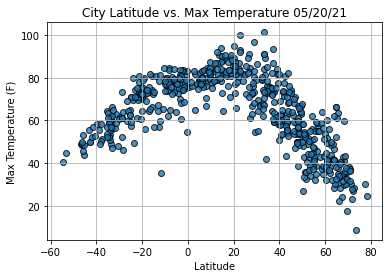

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

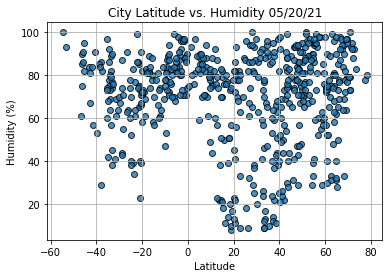

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

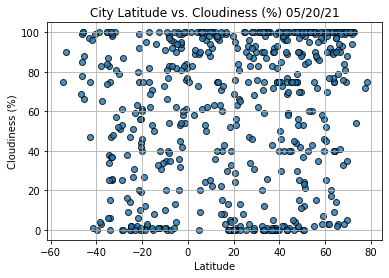

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

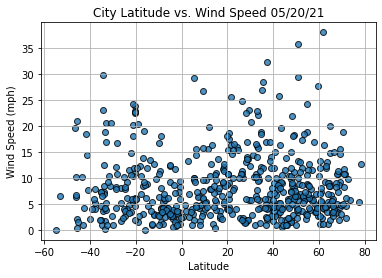

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [27]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [28]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,2021-05-20 23:00:57,3.0707,172.7902,81.84,81,89,6.93
3,Avera,US,2021-05-20 23:00:59,33.1940,-82.5271,83.91,46,59,10.09
4,Hasaki,JP,2021-05-20 23:00:59,35.7333,140.8333,75.60,85,100,28.43
7,Naze,JP,2021-05-20 23:01:00,28.3667,129.4833,76.32,82,87,13.15
8,The Valley,AI,2021-05-20 23:01:01,18.2170,-63.0578,82.81,73,52,11.74


In [29]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

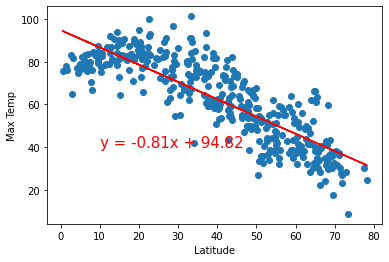

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

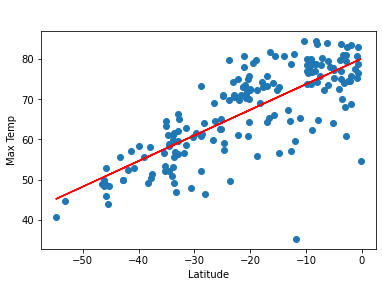

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

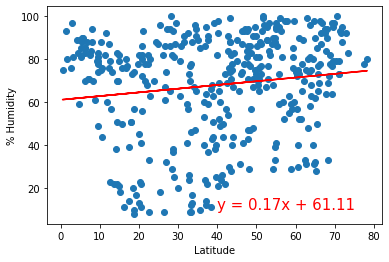

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

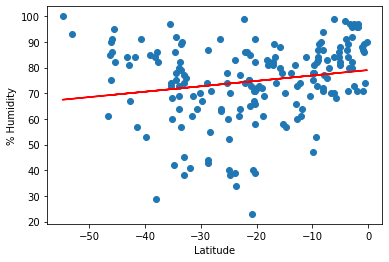

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

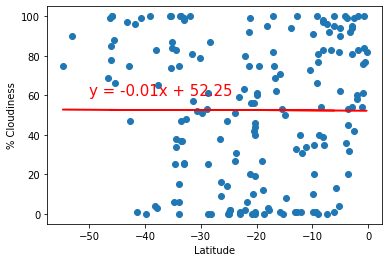

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

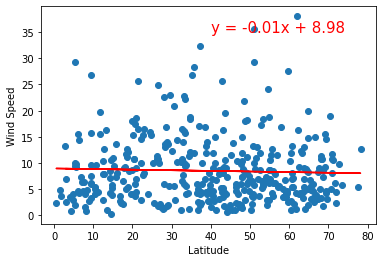

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

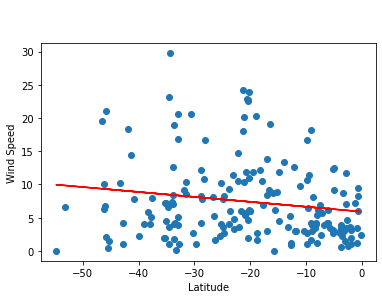

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))